#Marim Ashraf Elsayed Mahmoud Amer

# Speed Dating Match Prediction

## Input

#### All Features in the data except id & match columns
#### There are float64: 173 features, int64: 11 features, object: 8 features.

## Output

#### User needs to know the people matched or not and it is a binary classification task.

## Data mining function

#### Classification and prediction because we need to know if the girl or boy matched or not 

## The challenges 

#### Cleaning data and removing all columns is not important and did not affect the data by using feature selection.

## Impact

#### We will know if the people are matching or not.

## Steps

#### 1- Reading data and display correlation between the data.
#### 2- Visualizing data.
#### 3- Check the missing values in each feature.
#### 4- Select all float, int, and object features in different variables.
#### 5- Convert object columns into categorical type.
#### 6- Splitting data.
#### 7- Extract numerical features and categorical Features.
#### 8- Tuning pipeline.
    -	Use Pipeline function
    -	ColumnTransformer function
#### 9- Trials.
#### 10- Solve Imbalanced data.
#### 11- Trials



## Protocol 
#### I intend to use cross-validation.



#**The best solution**

## Trial after solving imbalanced data

**Trail_11**

Search: Random Search.

Classifier: XGB Classifier.

Public score: 0.88393

Private Score: 0.88497

# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reading data

In [ ]:
#Read Training Data by using CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/train.csv')

#Read Testing Data Data by using CSV file
df_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/test.csv')

# Correlation 

In [ ]:
#Correlation between features
df.corr()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
gender,1.000000,0.032132,-0.000875,-0.004192,0.017755,-0.004047,0.000410,0.009850,0.010318,-0.056275,0.004293,0.011520,-0.017636,-0.088138,0.027244,-0.358661,0.137767,0.119492,-0.054472,0.349116,0.131327,-0.131695,-0.035660,0.056205,-0.058486,0.094500,-0.027496,-0.072048,0.004045,0.008274,0.069427,-0.069071,-0.011617,-0.113948,-0.208852,0.028397,-0.099738,0.023241,-0.007684,0.228759,0.145324,-0.077061,-0.208608,-0.206215,-0.218061,-0.065324,0.217357,-0.054334,-0.105863,-0.166900,-0.305193,-0.160059,-0.132015,-0.077399,-0.327006,-0.222094,0.212598,0.008436,0.358708,-0.128036,-0.116111,0.038880,-0.353727,-0.138141,0.109446,-0.051003,-0.082631,0.081553,-0.306273,-0.030401,-0.321041,0.272461,0.291767,-0.046865,0.360655,-0.129111,-0.097964,-0.112585,-0.124766,0.066972,-0.027999,-0.054282,-0.120055,0.033399,-0.046997,-0.068505,0.150591,0.052213,-0.056286,0.067724,-0.100807,0.045450,0.087993,-0.002889,-0.008150,0.072425,0.227378,-0.148228,-0.071305,0.045059,-0.225662,-0.163630,-0.170337,-0.083114,0.079544,-0.151719,0.000678,0.233018,-0.119169,0.009902,0.240079,-0.229532,-0.035797,0.050539,-0.118053,-0.187272,0.286076,-0.119539,-0.181103,0.039954,-0.253489,-0.180378,0.134797,-0.134006,-0.159543,0.073694,-0.213561,-0.062882,-0.249641,0.282042,0.262282,-0.125038,0.363901,-0.169447,-0.083599,-0.140321,0.095417,-0.116650,-0.007924,-0.001287,-0.178150,0.054945,-0.009537,0.064466,0.321151,-0.267411,0.007755,0.003680,0.251143,0.291946,-0.095523,-0.043765,0.073421,-0.279596,-0.240175,0.265643,-0.299939,0.065740,0.163306,-0.274540,-0.186516,0.094793,-0.239556,0.039176,0.078254,-0.213160,-0.056307,-0.181189,0.154823,0.237649,-0.149604,0.362593,-0.252469,-0.150992,-0.169387,0.011476,-0.153701,-0.066626,-0.133302,-0.277085,0.080227,-0.065562,0.069091,0.006340
idg,0.032132,1.000000,0.330587,0.093823,0.391918,0.164705,0.174651,0.161976,0.139034,0.088372,0.006630,-0.019557,-0.014186,0.001640,-0.026071,-0.022933,0.018207,0.021344,0.001556,-0.019420,0.005954,0.025992,-0.014766,-0.025672,0.015192,-0.003001,-0.001070,0.000713,-0.001639,0.031788,0.027894,0.069341,-0.038091,0.016161,0.056349,-0.043024,-0.025829,-0.086469,0.165261,0.077981,0.075633,-0.005694,0.021910,-0.079038,-0.042987,0.050733,0.083485,-0.027315,0.008332,-0.010950,0.008516,-0.039631,-0.005953,0.005671,-0.034792,-0.047489,-0.010431,-0.061917,0.064929,-0.054237,0.001187,-0.005397,-0.091886,0.013375,0.039394,-0.015084,0.004993,-0.014381,0.063270,-0.044442,-0.018334,0.015002,-0.046757,-0.007714,0.005122,0.068580,-0.003279,0.022840,0.011894,-0.025905,0.013006,0.021721,-0.002354,0.059064,0.007296,-0.008596,-0.029040,-0.042309,-0.055453,-0.05527

In [ ]:
#Display the training data
df

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,0,-0.03,0,27.0,2.0,30.00,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,7.0,1.0,2.0,33.0,Ed.D. in higher education policy at TC,9.0,University of Michigan-Ann Arbor,"1,290.00","21,645.00",3.0,2.0,1.0,"Palo Alto, CA",NaN,NaN,1.0,6.0,3.0,University President,2.0,3.0,4.0,4.0,10.0,9.0,10.0,1.0,1.0,8.0,7.0,10.0,8.0,10.0,1.0,4.0,10.0,4.0,2.0,NaN,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,6.0,4.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,60.00,10.00,10.00,10.00,10.00,0.00,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,0,0.21,0,24.0,4.0,5.00,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,1.0,3.0,2.0,22.0,Engineering,5.0,NaN,NaN,NaN,2.0,8.0,1.0,"Boston, MA","2,021",NaN,5.0,6.0,1.0,Engineer or iBanker or consultant,7.0,8.0,3.0,7.0,10.0,6.0,6.0,7.0,2.0,9.0,5.0,6.0,7.0,7.0,6.0,8.0,8.0,4.0,7.0,9.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,6.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,22.00,17.00,17.00,17.00,10.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.00,20.00,15.00,20.00,10.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,0,0.43,0,34.0,2.0,15.00,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,3.0,2.0,2.0,27.0,Urban Planning,5.0,"Rizvi College of Architecture, Bombay University",NaN,NaN,6.0,1.0,1.0,"Bombay, India",NaN,NaN,1.0,4.0,2.0,Real Estate Consulting,7.0,4.0,2.0,7.0,6.0,8.0,8.0,8.0,6.0,6.0,8.0,4.0,10.0,10.0,7.0,7.0,5.0,10.0,2.0,NaN,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,6.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,15.00,20.00,20.00,15.00,20.00,10.00,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.

In [ ]:
# pd.set_option('display.max_rows', df.shape[0]+1)   #Display All Rows
pd.set_option('display.max_columns', df.shape[0]+1)   #Display All columns

In [ ]:
#Check missing values and sum the number of missing values in each feature 
df.isnull().sum().sort_values(ascending=False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
            ... 
position       0
round          0
wave           0
condtn         0
id             0
Length: 192, dtype: int64

In [ ]:
#Check the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [ ]:
#Data has integer type (id, gender, idg,	condtn,	wave,	round,	position,	order,	partner,	match,	samerace, and	id) columns
col_int = df.select_dtypes('int64')
col_int

,gender,idg,condtn,wave,round,position,order,partner,match,samerace,id
0,0,3,2,14,18,2,14,12,0,0,2583
1,1,14,1,3,10,2,8,8,0,0,6830
2,1,14,1,13,10,8,10,10,0,0,4840
3,1,38,2,9,20,18,6,7,0,1,5508
4,1,24,2,14,20,6,20,17,0,0,4828
...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,18,1,0,1,3390
5905,1,24,2,9,20,19,5,6,0,0,4130
5906,0,13,2,11,21,5,3,18,0,0,1178
5907,1,10,2,7,16,6,9,10,1,0,5016


In [ ]:
#Data has float type
col_float = df.select_dtypes('float64')
col_float

,positin1,pid,int_corr,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,2.0,372.0,-0.03,27.0,2.0,30.00,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,7.0,1.0,2.0,33.0,9.0,3.0,2.0,1.0,1.0,6.0,3.0,2.0,3.0,4.0,4.0,10.0,9.0,10.0,1.0,1.0,8.0,7.0,10.0,8.0,10.0,1.0,4.0,10.0,4.0,2.0,NaN,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,6.0,4.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,60.00,10.00,10.00,10.00,10.00,0.00,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,63.0,0.21,24.0,4.0,5.00,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,1.0,3.0,2.0,22.0,5.0,2.0,8.0,1.0,5.0,6.0,1.0,7.0,8.0,3.0,7.0,10.0,6.0,6.0,7.0,2.0,9.0,5.0,6.0,7.0,7.0,6.0,8.0,8.0,4.0,7.0,9.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,6.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,22.00,17.00,17.00,17.00,10.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.00,20.00,15.00,20.00,10.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
2,8.0,331.0,0.43,34.0,2.0,15.00,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,3.0,2.0,2.0,27.0,5.0,6.0,1.0,1.0,1.0,4.0,2.0,7.0,4.0,2.0,7.0,6.0,8.0,8.0,8.0,6.0,6.0,8.0,4.0,10.0,10.0,7.0,7.0,5.0,10.0,2.0,NaN,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,6.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,15.00,20.00,20.00,15.00,20.00,10.00,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.0,200.0,0.72,25.0,2.0,13.21,18.87,18.87,16.98,16.98,15.09,5.0,9.0,7.0,5.0,8.0,NaN,7.0,6.0,2.0,31.0,13.0,2.0,4.0,7.0,2.0,5.0,4.0,9.0,5.0,5.0,9.0,8.0,7.0,8.0,9.0,3.0,8.0,7.0,4.0,6.0,8.0,7.0,7.0,3.0,5.0,4.0,NaN,17.78,17.78,17.78,17.78,13.33,15.56,9.0,7.0,8.0,7.0,7.0,7.0,19.15,17.02,17.02,17.02,14.89,14.89,8.0,8.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0,9.0,10.0,9.0,9.0,9.0,7.0,2.0,

In [ ]:
#Data has object type (field,	undergra,	mn_sat,	tuition,	from,	zipcode,	income, and career) columns
col_object = df.select_dtypes('object')
col_object

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
1,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
2,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
3,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...,...
5904,Clinical Psychology,NaN,NaN,NaN,New York,"11,803","65,708.00",Psychologist
5905,MBA,NaN,NaN,NaN,Colombia,NaN,NaN,Consulting
5906,MA Science Education,University of Washington,"1,155.00","13,258.00",Seattle,"98,115","37,881.00",Teacher
5907,Biochemistry,NaN,NaN,NaN,Canada,NaN,NaN,pharmaceuticals and biotechnology


In [ ]:
#Copy of the data
df2 = df.copy()

In [ ]:
#Display the unique values in field column and and how much is the frequency
df2['field'].value_counts()

Business                          354
MBA                               324
Law                               309
Social Work                       272
International Affairs             189
                                 ... 
Stats                               3
theory                              3
epidemiology                        3
Business (Finance & Marketing)      3
Instructional Tech & Media          3
Name: field, Length: 259, dtype: int64

In [ ]:
#Select all object data
df2.select_dtypes('object')

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
1,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
2,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
3,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...,...
5904,Clinical Psychology,NaN,NaN,NaN,New York,"11,803","65,708.00",Psychologist
5905,MBA,NaN,NaN,NaN,Colombia,NaN,NaN,Consulting
5906,MA Science Education,University of Washington,"1,155.00","13,258.00",Seattle,"98,115","37,881.00",Teacher
5907,Biochemistry,NaN,NaN,NaN,Canada,NaN,NaN,pharmaceuticals and biotechnology


#Visualizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28476a9690>]],
      dtype=object)

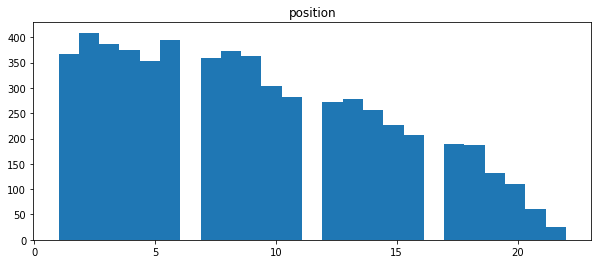

In [ ]:
#position column histogram
df.hist(column='position', bins=25, grid=False, figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28476a9c90>]],
      dtype=object)

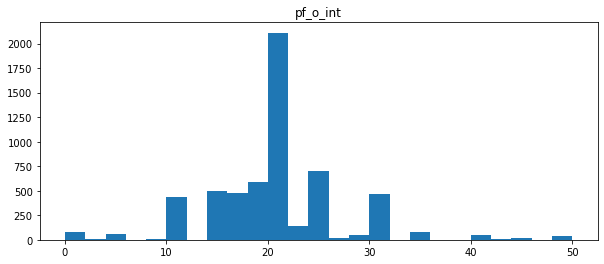

In [ ]:
#pf_o_int column histogram
df.hist(column='pf_o_int', bins=25, grid=False, figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28475efc50>]],
      dtype=object)

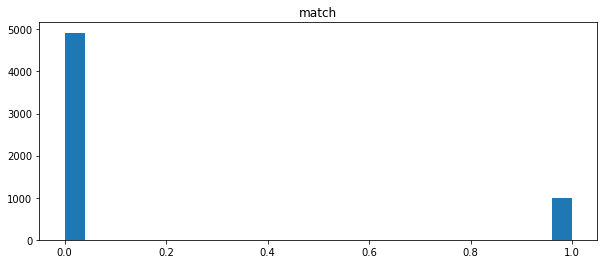

In [ ]:
#pf_o_int column histogram
df.hist(column='match', bins=25, grid=False, figsize=(10,4))

#Convert object columns into categorical type

In [ ]:
# field, undergra, mn_sat, tuition, from, zipcode, income, career Columns
# convert all object columns into categorical data to we can use it when use preprocessing Transformer

df2['field'] = df2['field'].astype('category')
df2['undergra'] = df2['undergra'].astype('category')
df2['mn_sat'] = df2['mn_sat'].astype('category')
df2['tuition'] = df2['tuition'].astype('category')
df2['from'] = df2['from'].astype('category')
df2['zipcode'] = df2['zipcode'].astype('category')
df2['income'] = df2['income'].astype('category')
df2['career'] = df2['career'].astype('category')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 190 entries, gender to amb5_3
dtypes: category(8), float64(173), int64(9)
memory usage: 8.4 MB


# Splitting Data

In [ ]:
#Splitting data into X train and y train

y_train = df2['match'].to_frame()
df2 = df2.drop(columns = ['match','id'])
X_train = df2.iloc[:,:]

#Drop Id column in testing data
df_test2 = df_test.drop(columns = ['id'])


#Extract numerical features and categorical Features

In [ ]:
#Numerical Features
numerical_features = list(X_train.select_dtypes(include= ['float64', 'int64']))

#Categorical Features
categorical_features = list(X_train.select_dtypes(include=['category']))

#Display numerical and categorical features
print('numerical_features: \n', numerical_features)
print('categorical_features\n', categorical_features)

numerical_features: 
 ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 

In [ ]:
#Length of numerical_features and categorical_features
print(len(numerical_features))
print(len(categorical_features))

182
8


# Tuning pipeline

I used Pipeline tuning each classifier has Pipeline and each of them before applying I did normalization and handle missing values in numerical features and categorical features I applied OneHotEncoder and handle also the missing values in features.

##The first fourth Trials without feature selection.
### Only handle missing values and use normalization for numerical data and OneHotEncoder for categorical data


**Trail_1**

Search: Grid Search.

Classifier: Random Forest Classifier.

Accuracy: Score: 0.83132

Public:0.83132

Private: 0.84892


---


**Trail_2**

Search: Random Search.

Classifier: XGB Classifier.

Accuracy: Score: 0.87931

Public:0.87931

Private: 0.88284

---



**Trail_3**

Search: Bayesian Search.

Classifier: SVM Classifier.

Accuracy: Score: 0.85707

Public: 0.85707

Private: 0.85945

---


 
**Trail_4**

Search: Random Search.

Classifier: XGB Classifier.

Accuracy: Score: 0.87931

Public: 0.87931

Private: 0.88284



---



---





##Using Feature Selection (SelectKBest)

**Trail_5**

Search: Random Search.

Classifier: XGB Classifier.

Accuracy: Score: 0.87409

Public: 0.87409

Private: 0.87507


---



**Trail_6**

Search: Bayesian Search.

Classifier: XGB Classifier.

Accuracy: Score: 0.86484

Public: 0.86484

Private: 0.86636

---



**Trail_7**

Search: Grid Search.

Classifier: Decision Tree Classifier.

Accuracy: Score: 0.81666

Public: 0.81666

Private: 0.82575

---



**Trail_8**

Search: Random Search.

Classifier: KNN Classifier.

Accuracy: Score: 0.81666

Public: 0.81666
Private: 0.82575

---



**Trail_9**

Search: Bayesian Search.

Classifier: XGB Classifier.

Accuracy: Score: 0.87931

Public: 0.87931

Private: 0.88284

---



---




##Trials after Solving imbalanced data

**Trail_10**

Search: Bayesian Search.

Classifier: XGB Classifier.

Accuracy: Score: 0.88386

Public: 0.88386

Private: 0.88221

---



---



**Trail_11**

Search: Random Search.

Classifier: XGB Classifier.

Public score: 0.88393

Private Score: 0.88497

***I used the search like(grid, random, and Bayesian search) to get the best values of the hyperparameter that is in each classifier I used***

In [ ]:
#Import liberaries

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
#import Type of Searches
!pip install scikit-optimize    #install skopt liberary
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
from platform import processor
transformer_numeric = Pipeline(
    steps= [
            ('imputer', SimpleImputer(strategy = 'mean')), #Handel missing data
            ('scaler', StandardScaler())] #Normalized data using StandardScaler
)


transformer_categorical = Pipeline(
    steps = [
             ('imputer', SimpleImputer(strategy='constant')), #Handel missing data
             ('onehot', OneHotEncoder(handle_unknown='ignore'))] #Convert categorical data using OneHotEncoder
)



#Preprocessing Transformer

#Applying steps of transformer in numerical and categorical features
preprocessor = ColumnTransformer(
    transformers= [
                  ('num', transformer_numeric, numerical_features),
                   ('cat', transformer_categorical, categorical_features)
    ]
)




#***Combine the preprocessing steps with a classifier***
#To Apply these steps in X_train and y_train 

#Random Forest Classifier
full_pipeline_RFC = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
              ('my_classifier', RandomForestClassifier(),)
    ]
)

#XGB Classifier
full_pipeline_XGBC = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
             ('my_classifier',XGBClassifier())
    ]
)

#Logistic Regression
full_pipeline_LR = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
             ('my_classifier', LogisticRegression())
    ]
)

#SVM Classifier
full_pipeline_SVM = Pipeline(
    steps= [
            ("preprocessing", preprocessor),
            ("my_classifier", SVC(probability=True))
    ]
)


#***Classifiers by using feature selection***

#XGBoost Classifier by using feature selection
full_pipeline_XGBC_FS = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
             ('selector', SelectKBest(mutual_info_classif, k=150)),
             ('my_classifier',XGBClassifier())
    ]
)

#SVM Classifier by using feature selection
full_pipeline_SVM_FS = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
             ('selector', SelectKBest(mutual_info_classif, k=500)),
             ('my_classifier',SVC(probability=True))
    ]
)

#Decision Tree Classifier by using feature selection
full_pipeline_DT_FS = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
             ('selector', SelectKBest(mutual_info_classif, k=500)),
             ('my_classifier', DecisionTreeClassifier())
    ]
)

#KNN Classifier by using feature selection
full_pipeline_KNN_FS = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
             ('selector', SelectKBest(mutual_info_classif, k=500)),
             ('my_classifier', KNeighborsClassifier())
    ]
)


# All Trials without feature selection

## Trial 1 
I filled all NaN values only 

### Grid Search

In [ ]:
#Random Forest Classifier
#fit the model before doing grid search

full_pipeline_RFC = full_pipeline_RFC.fit(X_train, y_train)
full_pipeline_RFC.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Search about the best values of hyperparameters

param_grid = {
    'preprocessing__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40, 50, 60],  
    # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20, 30, 40, 50]       
    # my_classifier__max_depth points to my_classifier->max_depth 
}

# n_jobs: the cpu current number of jobs
# cv=2: two-fold cross-validation

grid_search = GridSearchCV(
    full_pipeline_RFC, param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

#fit the model after getting the optimal hyperparameters values
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 2 folds for each of 25 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


best score 0.8357329834038766
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 60, 'preprocessing__num__imputer__strategy': 'mean'}


In [ ]:
#Predict test data
grid_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough.csv', index=False)

Score:0.83132

## Trial 2

### Random Search

In [ ]:
#XGB Classifier

#fit the model before doing random search

full_pipeline_XGBC = full_pipeline_XGBC.fit(X_train, y_train)
full_pipeline_XGBC.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_grid = {
    'preprocessing__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__max_depth': [1,2,3],
    # my_classifier__max_depth points to my_classifier->max_depth 
    'my_classifier__objective': ['binary:logistic']
    # my_classifier__objective points to my_classifier->objective 
}

# n_jobs: the cpu current number of jobs
# cv=5: two-fold cross-validation
#n_iter = 15: numbert of iteration

random_search = RandomizedSearchCV(
    full_pipeline_XGBC, param_grid, cv=5, verbose=1, n_jobs=2, 
    n_iter=15,
    scoring='roc_auc'
)

#fit the model after getting the optimal hyperparameters values
random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=15. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best score 0.8792090995756116
best score {'preprocessing__num__imputer__strategy': 'mean', 'my_classifier__objective': 'binary:logistic', 'my_classifier__max_depth': 3}


In [ ]:
#predict test data
random_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = random_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_2.csv', index=False)

Score: 0.87931

## Trial 3

### Bayesian Search

In [ ]:
# pip install scikit-optimize

In [ ]:
#SVM Classifier
#fit the model before doing Bayesian search

full_pipeline_SVM = full_pipeline_SVM.fit(X_train, y_train)
full_pipeline_SVM.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pram_grid = {
    "preprocessing__num__imputer__strategy": ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    "my_classifier__C": Real(1e-6, 1e+6, 'log-uniform'),
     # my_classifier__C points to my_classifier->C 
    "my_classifier__kernel": Categorical(['linear', 'poly', 'rbf']),
     # my_classifier__kernel points to my_classifier->kernel 
    "my_classifier__gamma": Categorical(['scale', 'auto']),
    # my_classifier__gamma points to my_classifier->gamma 
    "my_classifier__degree":Integer(1,10)
    # my_classifier__degree points to my_classifier->degree 
}

# cv=3: two-fold cross-validation
# n_iter = 3: numbert of iteration
bayesian_search = BayesSearchCV(
    full_pipeline_SVM, pram_grid, cv=3, verbose=1, 
    n_iter=3,
    random_state=0,
)

#fit the model after getting the optimal hyperparameters values
bayesian_search.fit(X_train, y_train)

print('best score {}'.format(bayesian_search.best_score_))
print('best score {}'.format(bayesian_search.best_params_))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

best score 0.8493803703598672
best score OrderedDict([('my_classifier__C', 2.2095350994035026), ('my_classifier__degree', 2), ('my_classifier__gamma', 'auto'), ('my_classifier__kernel', 'linear'), ('preprocessing__num__imputer__strategy', 'mean')])


In [ ]:
#predict test data
bayesian_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = bayesian_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_3_SVM.csv', index=False)

####Score: 0.85707

## Trial 4

###  Random Search

In [ ]:
#XGB Classifier

#fit the model before doing random search
full_pipeline_XGBC = full_pipeline_XGBC.fit(X_train, y_train)
full_pipeline_XGBC.predict(df_test)

In [ ]:
param_grid = {
      'preprocessing__num__imputer__strategy': ['mean'],
      # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
      'my_classifier__max_depth': [1,2,3,4,5,6],
      # my_classifier__max_depth points to my_classifier->max_depth
      'my_classifier__objective': ['binary:logistic'],
      #my_classifier__objective points to my_classifier->objective
      'my_classifier__n_estimators': range(60, 220, 40),
      #my_classifier__n_estimators points to my_classifier->n_estimators
      'my_classifier__learning_rate': [0.1, 0.01, 0.05]
      #my_classifier__learning_rate points to my_classifier->learning_rate
}

# cv=5: two-fold cross-validation
# n_iter = 15: numbert of iteration
random_search = RandomizedSearchCV(
    full_pipeline_XGBC, param_grid, cv=5, verbose=1, n_jobs=2, 
    n_iter=15,
    scoring='roc_auc'
)

#fit the model after getting the optimal hyperparameters values
random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best score 0.8826183727776723
best score {'preprocessing__num__imputer__strategy': 'mean', 'my_classifier__objective': 'binary:logistic', 'my_classifier__n_estimators': 140, 'my_classifier__max_depth': 5, 'my_classifier__learning_rate': 0.1}


In [ ]:
#predict test data
random_search.predict(df_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = random_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_4.csv', index=False)

Score: 0.87931

# Trials by Feature Selection

## Trial 5

### Random Search

In [ ]:
#XGB Classifier

#fit the model before doing random search
full_pipeline_XGBC_FS = full_pipeline_XGBC_FS.fit(X_train, y_train)
full_pipeline_XGBC_FS.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_grid = {
      'preprocessing__num__imputer__strategy': ['mean'],
      # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
      'my_classifier__max_depth': [1,2,3],
      # my_classifier__max_depth points to my_classifier->max_depth
      'my_classifier__objective': ['binary:logistic'],
      # my_classifier__objective points to my_classifier->objective
      'selector__k': [1500, 2000, 2100, 2200]
      # selector__k points to selector->k
}

# cv=5: two-fold cross-validation
# n_iter = 15: numbert of iteration
random_search = RandomizedSearchCV(
    full_pipeline_XGBC_FS, param_grid, cv=5, verbose=1, n_jobs=2, 
    n_iter=15,
    scoring='roc_auc'
)

#fit the model after getting the optimal hyperparameters values
random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 

best score 0.8797744910163281
best score {'selector__k': 2000, 'preprocessing__num__imputer__strategy': 'mean', 'my_classifier__objective': 'binary:logistic', 'my_classifier__max_depth': 3}


In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = random_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_5_FS.csv', index=False)

Score: 0.87409

##Trial 6

### Bayesian Search

In [ ]:
#XGB Classifier
#fit the model before doing Bayesian search

full_pipeline_XGBC_FS = full_pipeline_XGBC_FS.fit(X_train, y_train)
full_pipeline_XGBC_FS

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                  

In [ ]:
from skopt.space import Real, Categorical, Integer

pram_grid = {
        'preprocessing__num__imputer__strategy': Categorical(['mean']),
        # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
        'my_classifier__max_depth': [1,2,3],
        # my_classifier__max_depth points to my_classifier->max_depth
        'my_classifier__objective': Categorical(['binary:logistic']),
        # my_classifier__objective points to my_classifier->objective
        'my_classifier__n_estimators': [60, 100, 140, 180, 220],
        # my_classifier__n_estimators points to my_classifier->n_estimators
        'my_classifier__learning_rate': [0.1, 0.01, 0.05],
        # my_classifier__learning_rate points to my_classifier->learning_rate
        'selector__k': [1000, 1500, 2000]
        # selector__k points to selector->k
}

# cv=3: two-fold cross-validation
# n_iter = 3: numbert of iteration
bayesian_search = BayesSearchCV(
    full_pipeline_XGBC_FS, pram_grid, cv=3, verbose=1, 
    n_iter=3,
    random_state=0,
)

#fit the model after getting the optimal hyperparameters values
bayesian_search.fit(X_train, y_train)

print('best score {}'.format(bayesian_search.best_score_))
print('best score {}'.format(bayesian_search.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

best score 0.8673209708175537
best score OrderedDict([('my_classifier__learning_rate', 0.05), ('my_classifier__max_depth', 3), ('my_classifier__n_estimators', 220), ('my_classifier__objective', 'binary:logistic'), ('preprocessing__num__imputer__strategy', 'mean'), ('selector__k', 1000)])


In [ ]:

bayesian_search.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = bayesian_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_6_bayesian_FS.csv', index=False)

Score:0.86484

##Trial 7

### Grid Search

In [ ]:
#Decision Tree Classifier
#fit the model before doing grid search

full_pipeline_DT_FS = full_pipeline_DT_FS.fit(X_train, y_train)
full_pipeline_DT_FS

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                  

In [ ]:
pram_grid = { 
      "preprocessing__num__imputer__strategy": ['mean'],
      # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
      "my_classifier__criterion": ['gini', 'entropy'],
      # my_classifier__criterion points to my_classifier->criterion
      "my_classifier__max_depth": [3,4,5,6,7,8],
      # my_classifier__max_depth points to my_classifier->max_depth
      'selector__k': [1000, 1500, 2000],
      # selector__k points to selector->k
    }

# cv=3: two-fold cross-validation

grid_search = GridSearchCV(
    full_pipeline_DT_FS, pram_grid, cv=3, verbose=1, scoring='roc_auc'
)

#fit the model after getting the optimal hyperparameters values
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.

best score 0.80879772080131
best score {'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 4, 'preprocessing__num__imputer__strategy': 'mean', 'selector__k': 1500}


In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trial_7_DT.csv', index=False)

Score: 0.81666

##Trial 8

### Random Search

In [ ]:
#KNN Classifier

#fit the model before doing random search

full_pipelinefull_pipeline_KNN_FS_DT_FS = full_pipeline_KNN_FS.fit(X_train, y_train)
full_pipeline_KNN_FS

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                  

In [ ]:
param_grid = {
        'preprocessing__num__imputer__strategy': ['mean'],
        # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
        'my_classifier__n_neighbors': [5,6,7,8,9],
        # my_classifier__n_neighbors points to my_classifier->n_neighbors
        'my_classifier__weights': ['uniform', 'distance'],
        # my_classifier__weights points to my_classifier->weights
        'selector__k': [1000, 1500, 2000],
        # selector__k points to selector->k
}

# cv=5: two-fold cross-validation
# n_iter = 15: numbert of iteration
random_search = RandomizedSearchCV(
    full_pipeline_KNN_FS, param_grid, cv=5, verbose=1, n_jobs=2, 
    n_iter=15,
    scoring='roc_auc'
)

#fit the model after getting the optimal hyperparameters values
random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

best score 0.6840235847220626
best score {'selector__k': 1500, 'preprocessing__num__imputer__strategy': 'mean', 'my_classifier__weights': 'distance', 'my_classifier__n_neighbors': 5}


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = grid_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trial_8_KNN.csv', index=False)

Score: 0.81666

## Trial 9

### Random Search

In [ ]:
#XGB Classifier

#fit the model before doing random search

full_pipeline_XGBC_FS = full_pipeline_XGBC_FS.fit(X_train, y_train)
full_pipeline_XGBC_FS.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_grid = {
      'preprocessing__num__imputer__strategy': ['mean'],
      # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
      'my_classifier__max_depth': [2,3,4,5,6,7,8,9],
      # my_classifier__max_depth points to my_classifier->max_depth
      'my_classifier__objective': ['binary:logistic'],
      # my_classifier__objective points to my_classifier->objective
      'my_classifier__learning_rate': [0.05, 0.051, 0.052, 0.1],
      # my_classifier__learning_rate points to my_classifier->learning_rate
      'selector__k': [1500, 2000, 2100, 2200]
      # selector__k points to selector->k
}

# cv=5: two-fold cross-validation
# n_iter = 15: numbert of iteration
random_search = RandomizedSearchCV(
    full_pipeline_XGBC_FS, param_grid, cv=5, verbose=1, n_jobs=2, 
    n_iter=15,
    scoring='roc_auc'
)

#fit the model after getting the optimal hyperparameters values
random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 

best score 0.8814525561541435
best score {'selector__k': 2100, 'preprocessing__num__imputer__strategy': 'mean', 'my_classifier__objective': 'binary:logistic', 'my_classifier__max_depth': 6, 'my_classifier__learning_rate': 0.1}


In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = random_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_10_FS.csv', index=False)

Score: 0.87931

# Solve imbalanced data 

because the number of 0's and number of 1's in y_train are not equal so that the data imbalanced so we should use an imbalanced learn library to solve it 




In [ ]:
#Unique values and their counts
df2['match'].value_counts()

#There is imbalanced data

0    4921
1     988
Name: match, dtype: int64

In [ ]:
pip install imbalanced-learn

In [ ]:
#libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

In [ ]:
# ran_sample Object from RandomOverSampler
ran_sample = RandomOverSampler(random_state=0)

#Apply the algorithm in data(X_train, y_train) 
X_train, y_train = ran_sample.fit_resample(X_train, y_train)


##Trial 10

### Bayesian Search

In [ ]:
#XGB Classifier
#fit the model before doing Bayesian search

full_pipeline_XGBC_FS = full_pipeline_XGBC_FS.fit(X_train, y_train)
full_pipeline_XGBC_FS

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                  

In [ ]:
from skopt.space import Real, Categorical, Integer

pram_grid = {
      'preprocessing__num__imputer__strategy': Categorical(['mean']),
      # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
      'my_classifier__max_depth': [1,2,3,4,5,6],
      # my_classifier__max_depthpoints to my_classifier->max_depth
      'my_classifier__objective': Categorical(['binary:logistic']),
      # my_classifier__objective points to my_classifier->objective
      'my_classifier__n_estimators': [245, 270, 280, 260],
      # my_classifier__n_estimators points to my_classifier->n_estimators
      'my_classifier__learning_rate': [0.05, 0.051, 0.052, 0.1],
      # my_classifier__learning_rate points to my_classifier->learning_rate

}

# cv=3: two-fold cross-validation
# n_iter = 15: numbert of iteration
bayesian_search = BayesSearchCV(
    full_pipeline_XGBC_FS, pram_grid, cv=3, verbose=1, 
    n_iter=15,
    random_state=0,
)

#fit the model after getting the optimal hyperparameters values
bayesian_search.fit(X_train, y_train)

print('best score {}'.format(bayesian_search.best_score_))
print('best score {}'.format(bayesian_search.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

best score 0.9512290522173737
best score OrderedDict([('my_classifier__learning_rate', 0.1), ('my_classifier__max_depth', 6), ('my_classifier__n_estimators', 270), ('my_classifier__objective', 'binary:logistic'), ('preprocessing__num__imputer__strategy', 'mean')])


In [ ]:
#Predict test data
bayesian_search.predict(df_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = bayesian_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_9_bayesian.csv', index=False)

Score: 0.88386

##Trial 11

### Random Search

In [ ]:
#XGB Classifier
#fit the model before doing Bayesian search

full_pipeline_XGBC_FS = full_pipeline_XGBC_FS.fit(X_train, y_train)
full_pipeline_XGBC_FS

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                  

In [ ]:
from skopt.space import Real, Categorical, Integer

pram_grid = {
      'preprocessing__num__imputer__strategy': Categorical(['mean']),
      # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
      'my_classifier__max_depth': [4,5,6],
      # my_classifier__max_depthpoints to my_classifier->max_depth
      'my_classifier__objective': Categorical(['binary:logistic']),
      # my_classifier__objective points to my_classifier->objective
      'my_classifier__n_estimators': [270, 280, 260],
      # my_classifier__n_estimators points to my_classifier->n_estimators
      'my_classifier__learning_rate': [0.052, 0.1],
      # my_classifier__learning_rate points to my_classifier->learning_rate

}

# cv=3: two-fold cross-validation
# n_iter = 15: numbert of iteration
random_search = RandomizedSearchCV(
    full_pipeline_XGBC_FS, pram_grid, cv=5, verbose=1, n_jobs=2, 
    n_iter=15,
    scoring='roc_auc'
)
#fit the model after getting the optimal hyperparameters values
random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local

best score 0.9959455268867099
best score {'my_classifier__learning_rate': 0.1, 'my_classifier__max_depth': 6, 'my_classifier__n_estimators': 280, 'my_classifier__objective': 'binary:logistic', 'preprocessing__num__imputer__strategy': 'mean'}


In [ ]:
#Predict test data
random_search.predict(df_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Write the result in csv file

submission = pd.DataFrame()
submission['id'] = df_test['id']

submission['match'] = random_search.predict_proba(df_test2)[:,1]

submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/DM/Project_2/sample_submission_walkthrough_Trail_11_bayesian.csv', index=False)

Public score: 0.88393

Private Score: 0.88497

#**The best solution**

## Trial after solving imbalanced data

**Trail_11**

Search: Random Search.

Classifier: XGB Classifier.

Public score: 0.88393

Private Score: 0.88497


# Questions

### Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

Because the linear regression is used with continuous variables or tasks so when I used it with the classification task we can not do it but in logistic regression is used with discrete target. we can use the activation function and classify the task.

Logistic regression is used when the target variable is categorical such as spam in email.
Linear regression is used when I need to predict a variable depending on another variable and the target continuous.

### What's a decision tree and how it is different to a logistic regression model?

The decision tree is supervised learning and it uses classification and prediction and used with classification and regrission problems. that is split the entity according to a certain parameter.
It is consistes of root, nodes, and leaf node.


The decision tree uses many lines to split the data into many parts to classify the task or the input but logistics use only one line to split the data into two classes.

###What's the difference between grid search and random search?

Grid search:

            1- Try all hyperparameters with each other.
            2- Take a lot of time and computationally expensive.
            3- Get the optimal solution within the given range.

Random search:
            Tries random combinations of a range of values. It is better with large data and gives us local optimal.

            1- Try out a random subset.
            2- Good in time.
            3- Fewer trials but efficient.

### What's the difference between bayesian search and random search?





Random search: Tries random combinations of a range of values. It is better with large data and gives us local optimal.


            1- Try out a random subset.
            2- Good in time.
            3- Fewer trials but efficient.


 
Bayesian search:

            1- It combined Random search and Grid search.
            2- Use trials also that are learning from the previous try.
                Trial -> estimated error -> Bayesian model estimates the next parameter to try -> trial (resource: lab 873_auto_tune)
            3- Efficient